# Lead scoring case study 

#### There are quite a few goals for this case study:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

##### Steps:
    - Read and understand data
    - Data Preparation 
    - Data visualization and Dummy creatiion
    - Model prepration - Test-Train Split and scaling
    - Model Building - RFE for feature selection and VIF approch while building model
    - Model evaluation
    - Prediction

### Step 1: Reading and understanding data

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.shape

(9240, 37)

In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead_data.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Null data analysis
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
(lead_data.isnull().sum()/len(lead_data)*100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Step 2: Data Preparation

In [9]:
## Created the function to delete null value columns from the dataframe

def drop_columns(df,cols_list):
    for col in cols_list:
        df.drop(col, axis =1, inplace=True)


In [10]:
#dropping columns containing large number of null values
cols_drop = ['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Quality','Tags']
drop_columns(lead_data,cols_drop)
    

In [11]:
print(lead_data.shape)
print(lead_data.isnull().sum()/len(lead_data)*100)

(9240, 31)
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                       

In [12]:
#dropping unnecessary columns from the dataset:
cols_drop = ['Prospect ID','Lead Number','City','Country']
drop_columns(lead_data,cols_drop)

In [13]:
print(lead_data.shape)
print(lead_data.columns)

(9240, 27)
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [14]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Select,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,Select,No,No,Modified


In [15]:
#verify categorial columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 7802 

In [16]:
#Check value count of each column
for col in lead_data.columns:
    print(f'########{col}###########\n')
    print(lead_data[col].value_counts())

########Lead Origin###########

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
########Lead Source###########

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
########Do Not Email###########

No     8506
Yes     734
Name: Do Not Email, dtype: int64
########Do Not Call###########

No     9238
Yes       2
Name: Do Not Call, d

In [17]:
#there are some columns which contain select which is nothing but null values
select_columns = ['Specialization','How did you hear about X Education','Lead Profile',]
for col in select_columns:
    print(lead_data[col].value_counts())
    print('*****')

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
*****
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple So

In [18]:
#dropping cols contaning high percentage of 'select' values:
high_select_cols = ['Lead Profile','How did you hear about X Education']
drop_columns(lead_data,high_select_cols)

In [19]:
lead_data.shape

(9240, 25)

In [20]:
#Check value count of each column
for col in lead_data.columns:
    print(f'########{col}###########\n')
    print(lead_data[col].value_counts())

########Lead Origin###########

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
########Lead Source###########

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
########Do Not Email###########

No     8506
Yes     734
Name: Do Not Email, dtype: int64
########Do Not Call###########

No     9238
Yes       2
Name: Do Not Call, d

In [21]:
#dropping cols which are not making sense from the data segregation perspective - like one value count is too large as compared to the other value in the same col
other_columns = [ 'Through Recommendations', 'What matters most to you in choosing a course','Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement',]

drop_columns(lead_data,other_columns)

In [22]:
lead_data.shape

(9240, 12)

In [23]:
#lets vaerify data and handle remaining null columns
print(lead_data.shape)
print(lead_data.isnull().sum()/len(lead_data)*100)

(9240, 12)
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            15.562771
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64


In [24]:
lead_data['What is your current occupation']

0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238           NaN
9239    Unemployed
Name: What is your current occupation, Length: 9240, dtype: object

In [25]:
lead_data = lead_data[~lead_data['What is your current occupation'].isnull()]

In [26]:
lead_data.shape

(6550, 12)

In [27]:
print(lead_data.shape)
print(lead_data.isnull().sum()/len(lead_data)*100)

(6550, 12)
Lead Origin                               0.000000
Lead Source                               0.549618
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               1.984733
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.984733
Last Activity                             1.572519
Specialization                            0.274809
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64


In [28]:
#dropping rows containing small number of null values
lead_data = lead_data[~lead_data['Page Views Per Visit'].isnull()]

In [29]:
print(lead_data.shape)
lead_data.isnull().sum()

(6420, 12)


Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [30]:
#slicethe data without "select" keyword as it was treated as null value
lead_data = lead_data[lead_data['Specialization'] !='Select']
lead_data.Specialization.value_counts()

Finance Management                   748
Human Resource Management            666
Marketing Management                 664
Operations Management                392
Business Administration              310
IT Projects Management               278
Supply Chain Management              275
Banking, Investment And Insurance    266
Media and Advertising                161
Travel and Tourism                   149
International Business               136
Healthcare Management                123
Hospitality Management                90
E-COMMERCE                            80
Retail Management                     78
Rural and Agribusiness                58
E-Business                            43
Services Excellence                   25
Name: Specialization, dtype: int64

In [31]:
lead_data = lead_data[~lead_data['Lead Source'].isnull()]
lead_data = lead_data[~lead_data['Specialization'].isnull()]

In [32]:
print(lead_data.shape)
print(lead_data.isnull().sum()/len(lead_data)*100)

(4535, 12)
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


In [33]:
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4535.000000,4535.000000,4535.000000,4535.000000
mean,0.510695,4.293716,626.625358,2.937385
std,0.499941,5.451975,568.094959,2.143495
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,127.000000,2.000000
50%,1.000000,3.000000,391.000000,2.670000
75%,1.000000,5.000000,1119.500000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


In [34]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


In [35]:
#Calculating the Imbalance ratio
convert_zero = lead_data.loc[lead_data['Converted'] ==0]
convert_one = lead_data.loc[lead_data['Converted'] ==1]
imb_ratio = round(len(convert_zero)/len(convert_one),2)
imb_ratio

0.96

### Step 3: Visualizing the Data

In [36]:
#import lib
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
lead_data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,-0.002933,0.336092,-0.098751
TotalVisits,-0.002933,1.000000,0.113488,0.407609
Total Time Spent on Website,0.336092,0.113488,1.000000,0.186492
Page Views Per Visit,-0.098751,0.407609,0.186492,1.000000


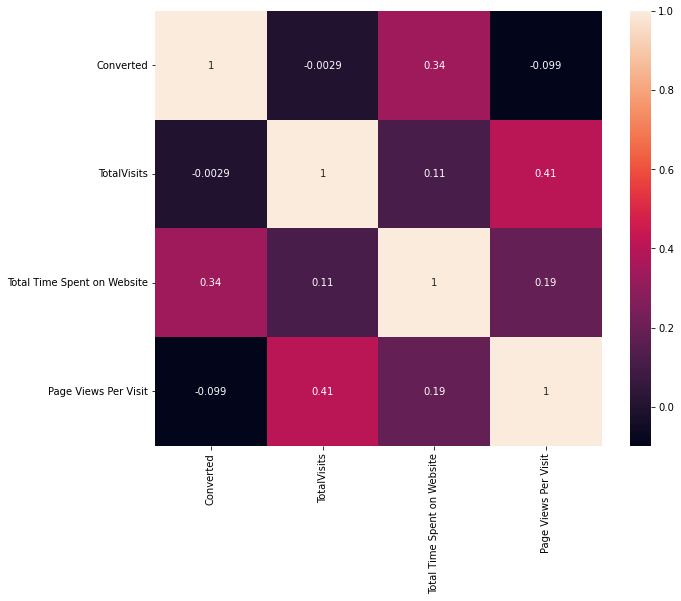

In [38]:
#Checking the correlation among varibles
plt.figure(figsize=(10,8))
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

#### 'TotalVisits' has high co-relation with 'Page Views Per Visit' and 'Total time spent on Websitre has a direct correlation with 'Converted'

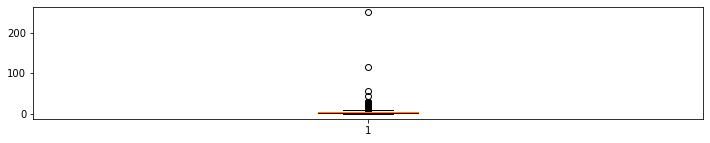

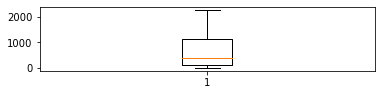

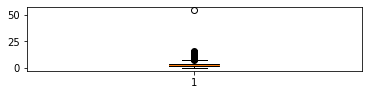

In [39]:
#checking the outliers
plt.figure(figsize = (12,7))

plt.subplot(3,1,1)
plt.boxplot(x = 'TotalVisits', data = lead_data)
plt.show()

plt.subplot(3,1,2)
plt.boxplot(x = 'Total Time Spent on Website', data = lead_data)
plt.show()

plt.subplot(3,1,3)
plt.boxplot(x = 'Page Views Per Visit', data = lead_data)
plt.show()

#### In the above boxplots,we can see there are not much of the outliers in the numerical cols which can affect our observations

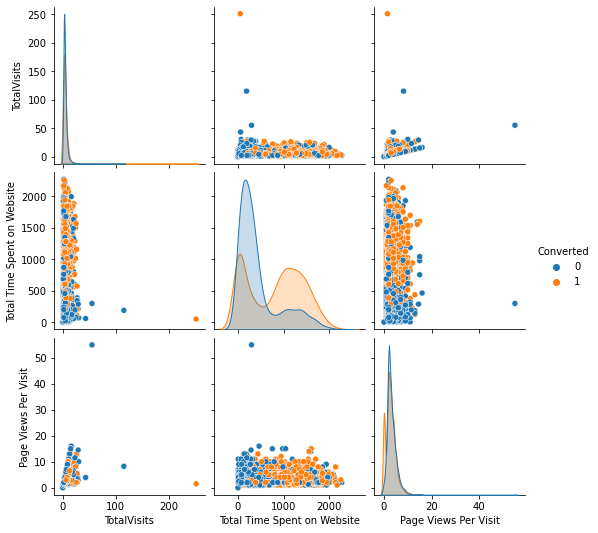

In [44]:
sns.pairplot(lead_data,hue='Converted')
plt.show()

In [45]:
categorial_col = lead_data.loc[:,lead_data.dtypes == 'object'].columns


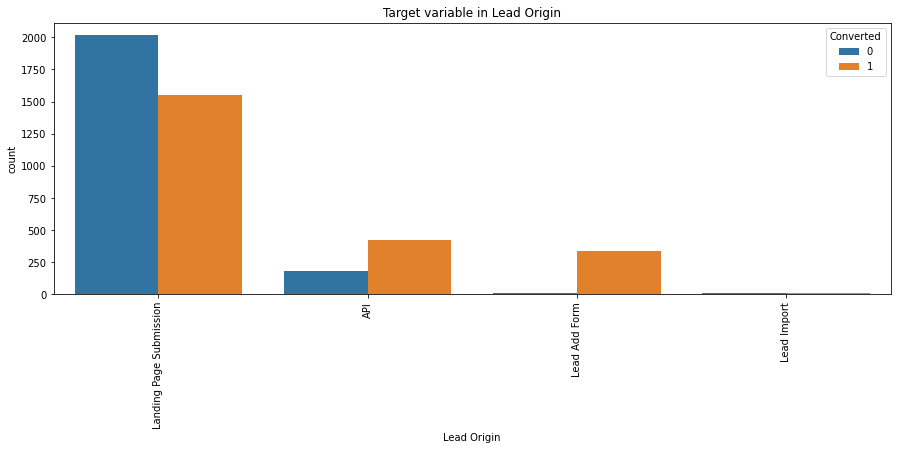

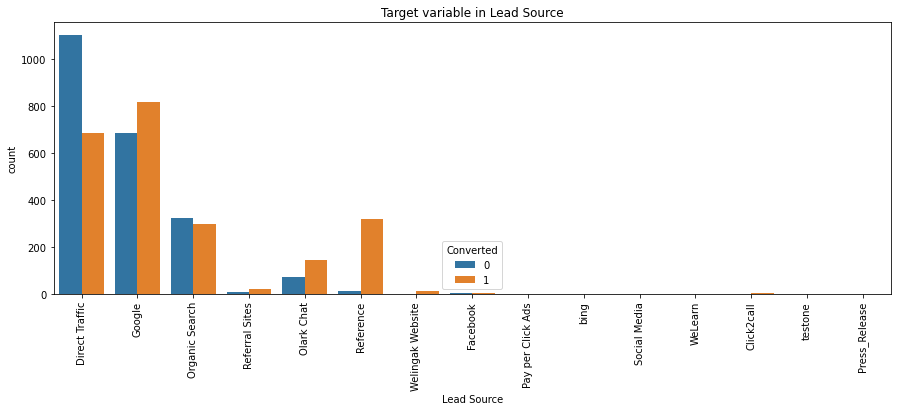

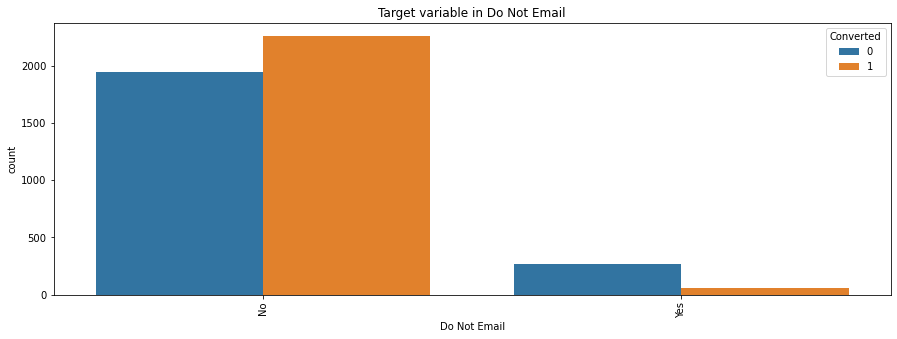

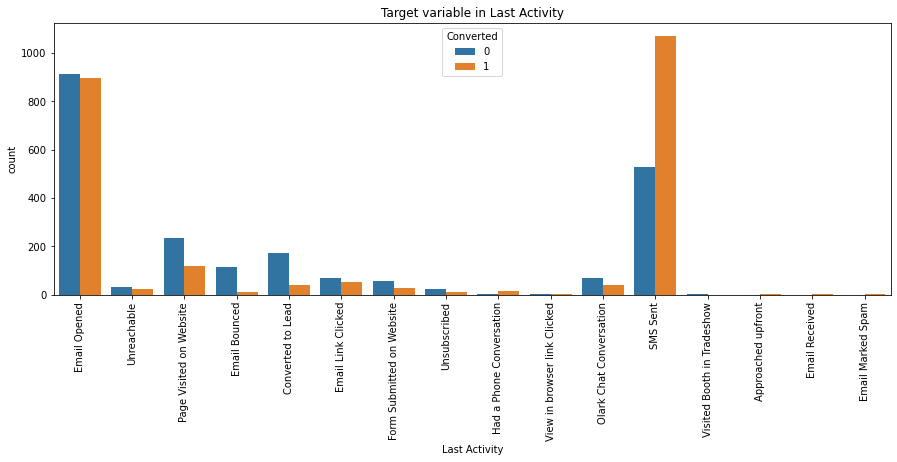

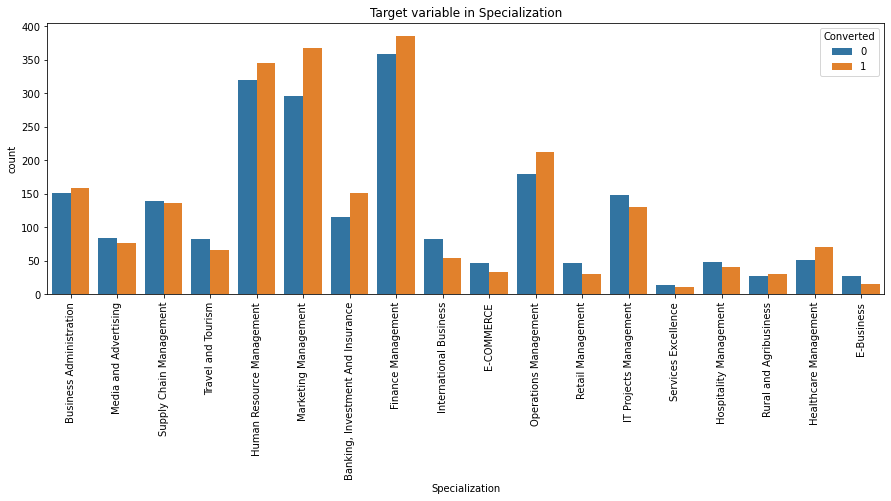

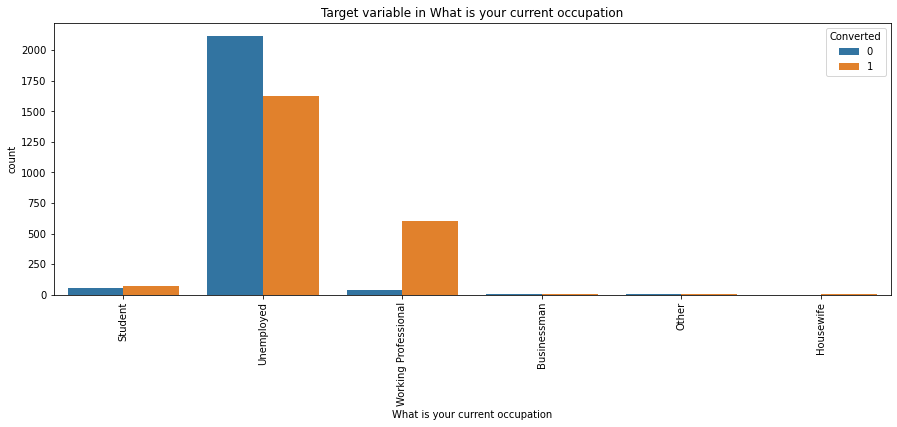

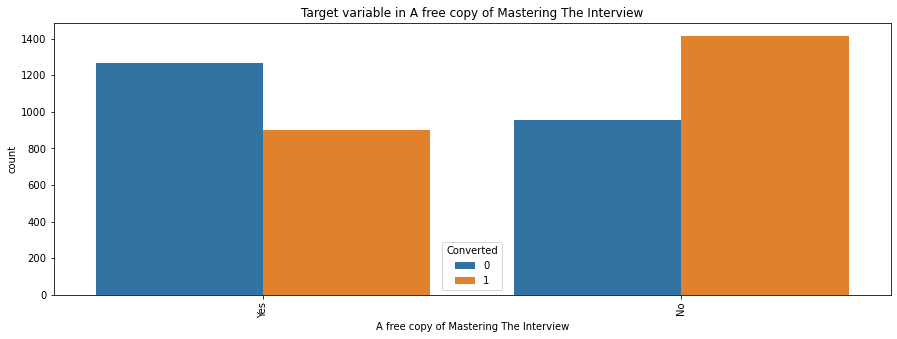

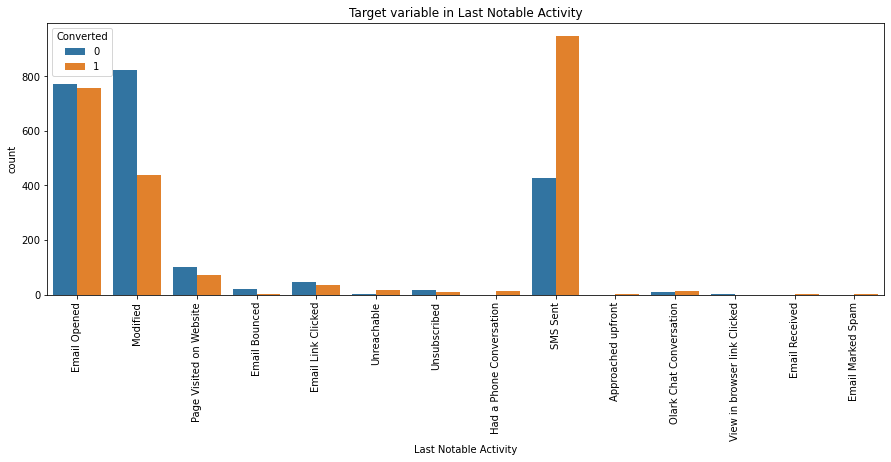

In [48]:
for col in categorial_col:
    
    plt.figure(figsize =(15,5))
    sns.countplot(lead_data[col], hue=lead_data.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ col)
    plt.xlabel(col)
    plt.show()

### Handling Dummy Variables - Categorial variable

In [49]:
lead_data.loc[:,lead_data.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
list(lead_data.loc[:,lead_data.dtypes == 'object'].columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [51]:
dummy_columns = list(lead_data.loc[:,lead_data.dtypes == 'object'].columns)

In [52]:
dummy_df = pd.get_dummies(lead_data[dummy_columns],drop_first= True)

In [53]:
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
dummy_df.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last 

In [55]:
lead_data_original = lead_data
lead_data = pd.concat([lead_data,dummy_df],axis = 1)

In [56]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,...,0,0,0,1,0,0,0,0,0,0
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,...,1,0,0,0,0,0,0,0,0,0
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,...,0,0,0,0,0,1,0,0,0,0


In [57]:
#dropping the actual categoirical cols
drop_columns(lead_data,dummy_columns)

In [58]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.00,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
10,1,8.0,1351,8.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,8.0,1343,2.67,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
lead_data.shape

(4535, 73)

### Step 4: Model prepration
#### Test-Train Split

In [60]:
#importing lib
from sklearn.model_selection import train_test_split

In [61]:
#Train Test split
X = lead_data.drop('Converted',axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,2.0,1532,2.00,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.00,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
10,8.0,1351,8.00,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,8.0,1343,2.67,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
X.shape

(4535, 72)

In [63]:
y = lead_data['Converted']

In [64]:
y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [65]:
y.shape

(4535,)

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3, random_state = 100)

In [67]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2006,14.0,255,7.00,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5140,5.0,12,1.67,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7588,4.0,30,4.00,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5244,6.0,158,3.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8663,11.0,190,3.67,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [68]:
print(f"X_train shape {X_train.shape}\n")
print(f"X_test shape {X_test.shape}\n")
print(f"y_train shape {y_train.shape}\n")
print(f"y_test shape {y_test.shape}\n")

X_train shape (3174, 72)

X_test shape (1361, 72)

y_train shape (3174,)

y_test shape (1361,)



#### Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
#Scaling of the numerical variables
numerical_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
numerical_col


['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [71]:
scaler = StandardScaler()
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])

In [72]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2006,1.604339,-0.648184,1.845831,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5140,0.111763,-1.076675,-0.588172,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7588,-0.054079,-1.044935,0.475848,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5244,0.277605,-0.819228,0.019187,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8663,1.106814,-0.762801,0.325150,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


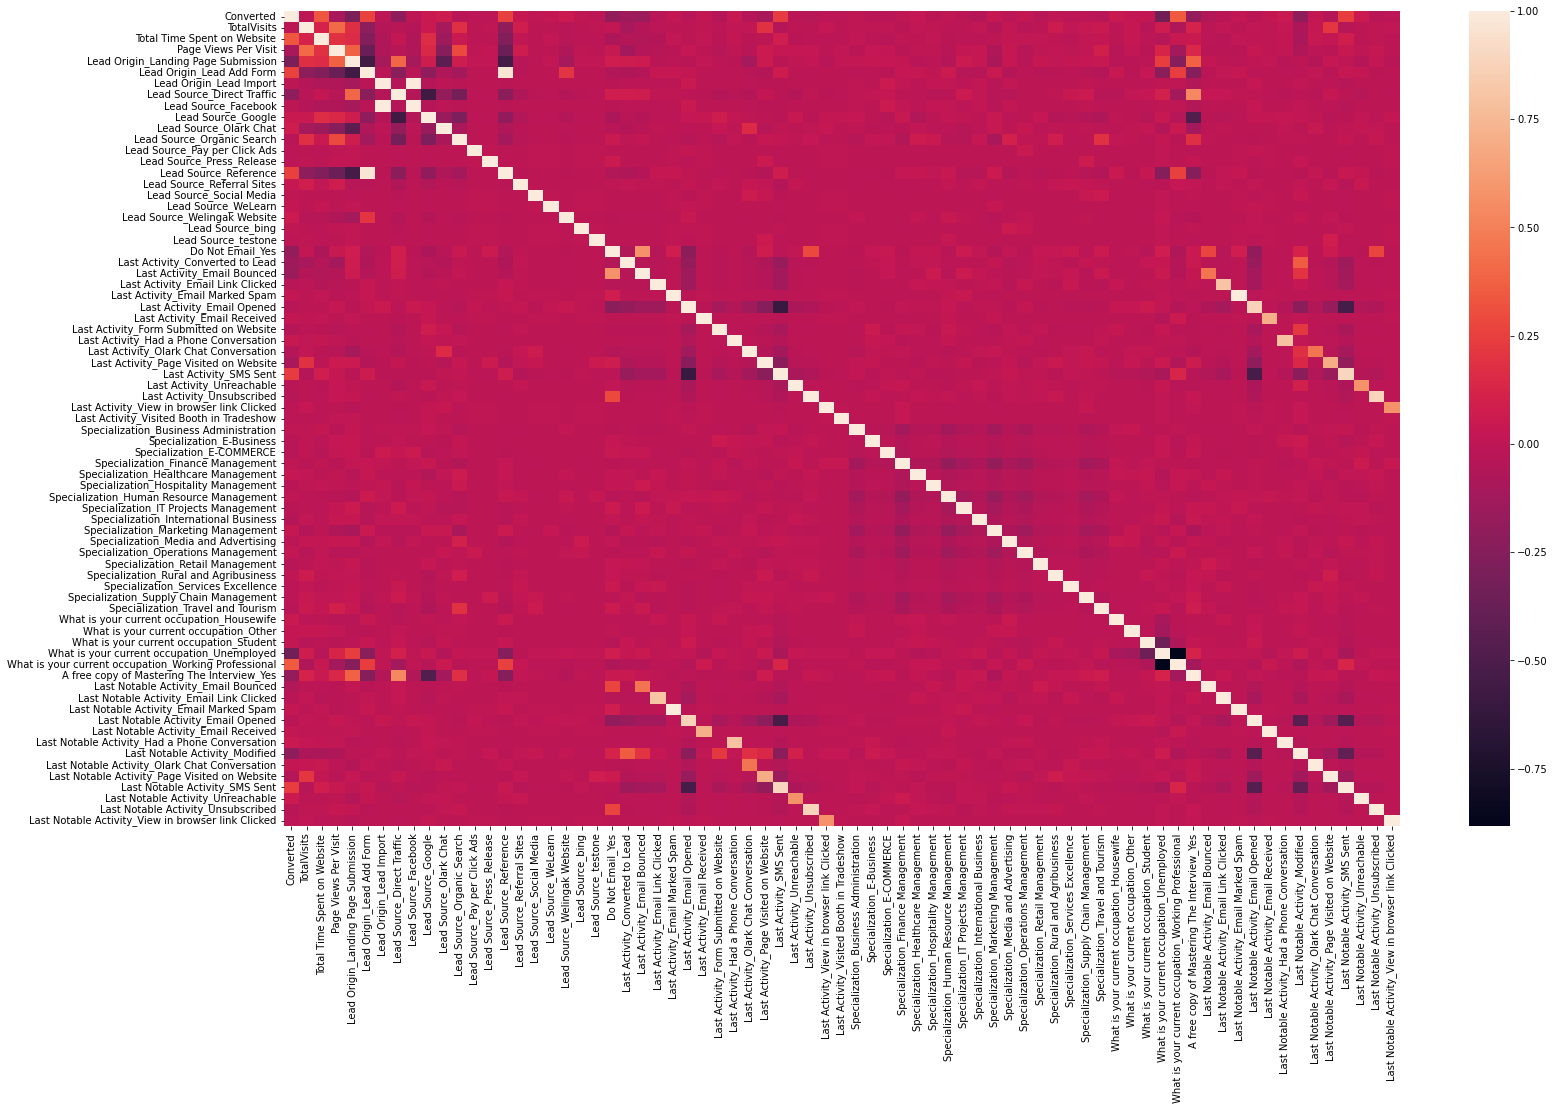

In [73]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(lead_data.corr())
plt.show()

### Step 5: Building a Logistic Regression Model
#### RFE
- 10-15 Best columns are chosen using RFE

In [76]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import metrics

In [77]:
#creating logistic regression object
lrm = LogisticRegression()

In [78]:
#eliminating columns using Recursive feature elimination
rfe = RFE(lrm,15)
rfe = rfe.fit(X_train,y_train)

In [79]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', False, 19),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Pay per Click Ads', False, 31),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 49),
 ('Lead Source_Social Media', False, 39),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 36),
 ('Lead Source_testone', False, 30),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 14),
 ('Last Activity_Emai

In [80]:
final_features = list(X_train.columns[rfe.support_])
final_features

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Reference',
 'Lead Source_Welingak Website',
 'Do Not Email_Yes',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_SMS Sent',
 'What is your current occupation_Housewife',
 'What is your current occupation_Working Professional',
 'Last Notable Activity_Email Bounced',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_Unreachable']

In [81]:
X_train = X_train[final_features]
X_train

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
2006,-0.648184,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5140,-1.076675,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7588,-1.044935,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5244,-0.819228,1,0,0,0,0,0,0,0,1,0,0,0,0,0
8663,-0.762801,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,-0.420714,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4243,0.776592,1,0,0,0,0,0,0,0,0,0,0,0,0,0
942,1.496033,1,0,0,0,0,0,0,0,0,0,0,0,0,0
164,0.522672,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Fitting the Logistic Regression model

In [82]:
X_train_sm = sm.add_constant(X_train)

In [83]:
model = sm.GLM(y_train,X_train_sm)

In [84]:
model_res = model.fit()

In [85]:
model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3158
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.15600
Method:                          IRLS   Log-Likelihood:                -1547.2
Date:                Mon, 10 Jul 2023   Deviance:                       492.64
Time:                        21:37:13   Pearson chi2:                     493.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4550
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5740      0.021     27.721      0.000       0.533       0.615
Total Time Spent on Website                              0.1892      0.007     25.606      0.000       0.175       0.204
Lead Origin_Landing Page Submission                     -0.2123      0.021    -10.045      0.000      -0.254      -0.171
Lead Origin_Lead Add Form                               -0.0330      0.229     -0.144      0.885      -0.482       0.416
Lead Source_Reference                                    0.3815      0.230      1.660      0.097      -0.069       0.832
Lead Source_Welingak Website                             0.5546      0.263      2.106      0.035       0.038       1.071
Do Not Email_Yes                                        -0.2088      0.034     -6.214      0.000      -0.275      -0.143
Last Activity_Converted to Lead                         -0.1946      0.035     -5.516      0.000      -0.264      -0.125
Last Activity_Email Bounced                             -0.0863      0.057     -1.512      0.130      -0.198       0.026
Last Activity_Had a Phone Conversation                   0.1289      0.162      0.797      0.425      -0.188       0.446
Last Activity_SMS Sent                                   0.1568      0.015     10.279      0.000       0.127       0.187
What is your current occupation_Housewife                0.4624      0.162      2.862      0.004       0.146       0.779
What is your current occupation_Working Professional     0.3221      0.021     15.443      0.000       0.281       0.363
Last Notable Activity_Email Bounced                      0.1344      0.102      1.315      0.189      -0.066       0.335
Last Notable Activity_Had a Phone Conversation           0.2505      0.220      1.138      0.255      -0.181       0.682
Last Notable Activity_Unreachable                        0.3547      0.115      3.097      0.002       0.130       0.579
========================================================================================================================
"""

#### Calculating VIF 

In [86]:
#Creating a function to calculate VIF
def VarianceInflationFactor(X_input):
    vif = pd.DataFrame()
    vif['Features'] = X_input.columns
    vif['VIF'] = [variance_inflation_factor(X_input.values,i) for i in range(X_input.shape[1])]
    return vif.sort_values(by = 'VIF', ascending = False)

In [87]:
VarianceInflationFactor(X_train)

,Features,VIF
2,Lead Origin_Lead Add Form,77.097389
3,Lead Source_Reference,74.142464
4,Lead Source_Welingak Website,4.001648
8,Last Activity_Had a Phone Conversation,2.178391
13,Last Notable Activity_Had a Phone Conversation,2.170065
7,Last Activity_Email Bounced,1.857681
5,Do Not Email_Yes,1.668247
1,Lead Origin_Landing Page Submission,1.619402
9,Last Activity_SMS Sent,1.561316
12,Last Notable Activity_Email Bounced,1.272288


As we can see above, the VIF and p-values of columns `Lead Origin_Lead Add Form` are quite large. SO eliminating the cols which are possessing high p-values

In [88]:
#eliminating 'Lead Origin_Lead Add Form'
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

##### Creating a function to fit the model

In [89]:
def logisticRegressionModel(y_train,X_train):
    X_train_sm = sm.add_constant(X_train)
    lrmodel = sm.GLM(y_train,X_train_sm)
    res = lrmodel.fit()
    return res

In [90]:
lr_res = logisticRegressionModel(y_train,X_train)

In [91]:
lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3159
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.15595
Method:                          IRLS   Log-Likelihood:                -1547.2
Date:                Mon, 10 Jul 2023   Deviance:                       492.64
Time:                        21:37:14   Pearson chi2:                     493.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4551
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5738      0.021     27.825      0.000       0.533       0.614
Total Time Spent on Website                              0.1892      0.007     25.629      0.000       0.175       0.204
Lead Origin_Landing Page Submission                     -0.2120      0.021    -10.067      0.000      -0.253      -0.171
Lead Source_Reference                                    0.3488      0.034     10.241      0.000       0.282       0.416
Lead Source_Welingak Website                             0.5219      0.133      3.916      0.000       0.261       0.783
Do Not Email_Yes                                        -0.2087      0.034     -6.214      0.000      -0.275      -0.143
Last Activity_Converted to Lead                         -0.1946      0.035     -5.516      0.000      -0.264      -0.125
Last Activity_Email Bounced                             -0.0863      0.057     -1.512      0.131      -0.198       0.026
Last Activity_Had a Phone Conversation                   0.1289      0.162      0.798      0.425      -0.188       0.446
Last Activity_SMS Sent                                   0.1568      0.015     10.285      0.000       0.127       0.187
What is your current occupation_Housewife                0.4625      0.162      2.862      0.004       0.146       0.779
What is your current occupation_Working Professional     0.3222      0.021     15.450      0.000       0.281       0.363
Last Notable Activity_Email Bounced                      0.1344      0.102      1.315      0.188      -0.066       0.335
Last Notable Activity_Had a Phone Conversation           0.2507      0.220      1.139      0.255      -0.181       0.682
Last Notable Activity_Unreachable                        0.3548      0.114      3.099      0.002       0.130       0.579
========================================================================================================================
"""

In the above summary we can see various columns having p-value way larger than 0.005

In [92]:
VarianceInflationFactor(X_train)

,Features,VIF
7,Last Activity_Had a Phone Conversation,2.178390
12,Last Notable Activity_Had a Phone Conversation,2.170065
6,Last Activity_Email Bounced,1.857681
4,Do Not Email_Yes,1.668233
1,Lead Origin_Landing Page Submission,1.619398
8,Last Activity_SMS Sent,1.561309
11,Last Notable Activity_Email Bounced,1.272288
2,Lead Source_Reference,1.235891
10,What is your current occupation_Working Profes...,1.227218
0,Total Time Spent on Website,1.108878


Vif values are still in limits. Eliminating `Last Activity_Had a Phone Conversation` as p-value > 0.05

In [93]:
#eliminating 'Last Activity_Had a Phone Conversation'
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [94]:
lr_res = logisticRegressionModel(y_train,X_train)
lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3160
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.15593
Method:                          IRLS   Log-Likelihood:                -1547.5
Date:                Mon, 10 Jul 2023   Deviance:                       492.74
Time:                        21:37:14   Pearson chi2:                     493.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4550
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5738      0.021     27.830      0.000       0.533       0.614
Total Time Spent on Website                              0.1893      0.007     25.637      0.000       0.175       0.204
Lead Origin_Landing Page Submission                     -0.2117      0.021    -10.054      0.000      -0.253      -0.170
Lead Source_Reference                                    0.3494      0.034     10.262      0.000       0.283       0.416
Lead Source_Welingak Website                             0.5220      0.133      3.917      0.000       0.261       0.783
Do Not Email_Yes                                        -0.2080      0.034     -6.194      0.000      -0.274      -0.142
Last Activity_Converted to Lead                         -0.1949      0.035     -5.527      0.000      -0.264      -0.126
Last Activity_Email Bounced                             -0.0874      0.057     -1.531      0.126      -0.199       0.024
Last Activity_SMS Sent                                   0.1563      0.015     10.261      0.000       0.126       0.186
What is your current occupation_Housewife                0.4621      0.162      2.860      0.004       0.145       0.779
What is your current occupation_Working Professional     0.3226      0.021     15.478      0.000       0.282       0.363
Last Notable Activity_Email Bounced                      0.1344      0.102      1.315      0.189      -0.066       0.335
Last Notable Activity_Had a Phone Conversation           0.3793      0.150      2.531      0.011       0.086       0.673
Last Notable Activity_Unreachable                        0.3544      0.114      3.095      0.002       0.130       0.579
========================================================================================================================
"""

In [95]:
VarianceInflationFactor(X_train)

,Features,VIF
6,Last Activity_Email Bounced,1.856653
4,Do Not Email_Yes,1.666848
1,Lead Origin_Landing Page Submission,1.616021
7,Last Activity_SMS Sent,1.558592
10,Last Notable Activity_Email Bounced,1.272287
2,Lead Source_Reference,1.234971
9,What is your current occupation_Working Profes...,1.226250
0,Total Time Spent on Website,1.108818
5,Last Activity_Converted to Lead,1.075719
12,Last Notable Activity_Unreachable,1.004136


Vif values are still in limits. Eliminating `Last Notable Activity_Email Bounced` as p-value > 0.05

In [96]:
X_train.drop('Last Notable Activity_Email Bounced', axis = 1, inplace = True)

In [97]:
lr_res = logisticRegressionModel(y_train,X_train)
lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3161
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.15597
Method:                          IRLS   Log-Likelihood:                -1548.4
Date:                Mon, 10 Jul 2023   Deviance:                       493.01
Time:                        21:37:15   Pearson chi2:                     493.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4546
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5740      0.021     27.836      0.000       0.534       0.614
Total Time Spent on Website                              0.1895      0.007     25.664      0.000       0.175       0.204
Lead Origin_Landing Page Submission                     -0.2120      0.021    -10.067      0.000      -0.253      -0.171
Lead Source_Reference                                    0.3493      0.034     10.259      0.000       0.283       0.416
Lead Source_Welingak Website                             0.5220      0.133      3.917      0.000       0.261       0.783
Do Not Email_Yes                                        -0.2072      0.034     -6.173      0.000      -0.273      -0.141
Last Activity_Converted to Lead                         -0.1948      0.035     -5.524      0.000      -0.264      -0.126
Last Activity_Email Bounced                             -0.0593      0.053     -1.120      0.263      -0.163       0.044
Last Activity_SMS Sent                                   0.1563      0.015     10.256      0.000       0.126       0.186
What is your current occupation_Housewife                0.4621      0.162      2.860      0.004       0.145       0.779
What is your current occupation_Working Professional     0.3228      0.021     15.483      0.000       0.282       0.364
Last Notable Activity_Had a Phone Conversation           0.3792      0.150      2.530      0.011       0.085       0.673
Last Notable Activity_Unreachable                        0.3543      0.115      3.095      0.002       0.130       0.579
========================================================================================================================
"""

In [98]:
VarianceInflationFactor(X_train)

,Features,VIF
4,Do Not Email_Yes,1.666394
1,Lead Origin_Landing Page Submission,1.615902
6,Last Activity_Email Bounced,1.595111
7,Last Activity_SMS Sent,1.558589
2,Lead Source_Reference,1.234964
9,What is your current occupation_Working Profes...,1.226192
0,Total Time Spent on Website,1.108416
5,Last Activity_Converted to Lead,1.075711
11,Last Notable Activity_Unreachable,1.004136
3,Lead Source_Welingak Website,1.003510


VIF values are pretty good. Now eliminating `Last Activity_Email Bounced` as p-value >> 0.005

In [99]:
X_train.drop('Last Activity_Email Bounced', axis = 1, inplace = True)

In [100]:
lr_res = logisticRegressionModel(y_train,X_train)
lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3162
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.15598
Method:                          IRLS   Log-Likelihood:                -1549.0
Date:                Mon, 10 Jul 2023   Deviance:                       493.21
Time:                        21:37:15   Pearson chi2:                     493.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4544
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5732      0.021     27.813      0.000       0.533       0.614
Total Time Spent on Website                              0.1895      0.007     25.673      0.000       0.175       0.204
Lead Origin_Landing Page Submission                     -0.2123      0.021    -10.079      0.000      -0.254      -0.171
Lead Source_Reference                                    0.3495      0.034     10.263      0.000       0.283       0.416
Lead Source_Welingak Website                             0.5220      0.133      3.917      0.000       0.261       0.783
Do Not Email_Yes                                        -0.2291      0.027     -8.381      0.000      -0.283      -0.176
Last Activity_Converted to Lead                         -0.1938      0.035     -5.496      0.000      -0.263      -0.125
Last Activity_SMS Sent                                   0.1588      0.015     10.530      0.000       0.129       0.188
What is your current occupation_Housewife                0.4630      0.162      2.865      0.004       0.146       0.780
What is your current occupation_Working Professional     0.3227      0.021     15.479      0.000       0.282       0.364
Last Notable Activity_Had a Phone Conversation           0.3800      0.150      2.536      0.011       0.086       0.674
Last Notable Activity_Unreachable                        0.3553      0.115      3.102      0.002       0.131       0.580
========================================================================================================================
"""

In [101]:
VarianceInflationFactor(X_train)

,Features,VIF
1,Lead Origin_Landing Page Submission,1.603925
6,Last Activity_SMS Sent,1.527531
2,Lead Source_Reference,1.234702
8,What is your current occupation_Working Profes...,1.226052
0,Total Time Spent on Website,1.108332
4,Do Not Email_Yes,1.100083
5,Last Activity_Converted to Lead,1.075126
10,Last Notable Activity_Unreachable,1.004113
3,Lead Source_Welingak Website,1.003486
7,What is your current occupation_Housewife,1.003269


It is clear that VIF values are well under limits. Now eliminating `Last Notable Activity_Had a Phone Conversation	`

In [102]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [103]:
lr_res = logisticRegressionModel(y_train,X_train)
lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3163
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.15625
Method:                          IRLS   Log-Likelihood:                -1552.2
Date:                Mon, 10 Jul 2023   Deviance:                       494.21
Time:                        21:37:16   Pearson chi2:                     494.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4527
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5774      0.021     28.085      0.000       0.537       0.618
Total Time Spent on Website                              0.1899      0.007     25.714      0.000       0.175       0.204
Lead Origin_Landing Page Submission                     -0.2154      0.021    -10.238      0.000      -0.257      -0.174
Lead Source_Reference                                    0.3465      0.034     10.172      0.000       0.280       0.413
Lead Source_Welingak Website                             0.5186      0.133      3.888      0.000       0.257       0.780
Do Not Email_Yes                                        -0.2298      0.027     -8.400      0.000      -0.283      -0.176
Last Activity_Converted to Lead                         -0.1950      0.035     -5.526      0.000      -0.264      -0.126
Last Activity_SMS Sent                                   0.1573      0.015     10.435      0.000       0.128       0.187
What is your current occupation_Housewife                0.4613      0.162      2.852      0.004       0.144       0.778
What is your current occupation_Working Professional     0.3225      0.021     15.454      0.000       0.282       0.363
Last Notable Activity_Unreachable                        0.3532      0.115      3.082      0.002       0.129       0.578
========================================================================================================================
"""

In [104]:
VarianceInflationFactor(X_train)

,Features,VIF
1,Lead Origin_Landing Page Submission,1.602912
6,Last Activity_SMS Sent,1.527001
2,Lead Source_Reference,1.234669
8,What is your current occupation_Working Profes...,1.225824
0,Total Time Spent on Website,1.107855
4,Do Not Email_Yes,1.100066
5,Last Activity_Converted to Lead,1.075083
9,Last Notable Activity_Unreachable,1.004110
3,Lead Source_Welingak Website,1.003483
7,What is your current occupation_Housewife,1.003267


It is clear that VIF values are well under limits. Now eliminating `What is your current occupation_Housewife`

In [105]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [106]:
lr_res = logisticRegressionModel(y_train,X_train)
lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3164
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.15660
Method:                          IRLS   Log-Likelihood:                -1556.3
Date:                Mon, 10 Jul 2023   Deviance:                       495.48
Time:                        21:37:16   Pearson chi2:                     495.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4506
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5794      0.021     28.165      0.000       0.539       0.620
Total Time Spent on Website                              0.1903      0.007     25.743      0.000       0.176       0.205
Lead Origin_Landing Page Submission                     -0.2159      0.021    -10.251      0.000      -0.257      -0.175
Lead Source_Reference                                    0.3482      0.034     10.213      0.000       0.281       0.415
Lead Source_Welingak Website                             0.5174      0.134      3.875      0.000       0.256       0.779
Do Not Email_Yes                                        -0.2307      0.027     -8.423      0.000      -0.284      -0.177
Last Activity_Converted to Lead                         -0.1963      0.035     -5.557      0.000      -0.266      -0.127
Last Activity_SMS Sent                                   0.1559      0.015     10.334      0.000       0.126       0.185
What is your current occupation_Working Professional     0.3212      0.021     15.378      0.000       0.280       0.362
Last Notable Activity_Unreachable                        0.3515      0.115      3.063      0.002       0.127       0.576
========================================================================================================================
"""

In [107]:
VarianceInflationFactor(X_train)

,Features,VIF
1,Lead Origin_Landing Page Submission,1.599683
6,Last Activity_SMS Sent,1.525946
2,Lead Source_Reference,1.232745
7,What is your current occupation_Working Profes...,1.225559
0,Total Time Spent on Website,1.107499
4,Do Not Email_Yes,1.099980
5,Last Activity_Converted to Lead,1.074976
8,Last Notable Activity_Unreachable,1.004100
3,Lead Source_Welingak Website,1.003480


In [108]:
X_train.drop('Last Notable Activity_Unreachable', axis = 1, inplace = True)

In [109]:
lr_res = logisticRegressionModel(y_train,X_train)
lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3165
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                         0.15701
Method:                          IRLS   Log-Likelihood:                -1561.0
Date:                Mon, 10 Jul 2023   Deviance:                       496.95
Time:                        21:37:16   Pearson chi2:                     497.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4481
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5836      0.021     28.398      0.000       0.543       0.624
Total Time Spent on Website                              0.1904      0.007     25.717      0.000       0.176       0.205
Lead Origin_Landing Page Submission                     -0.2183      0.021    -10.359      0.000      -0.260      -0.177
Lead Source_Reference                                    0.3483      0.034     10.203      0.000       0.281       0.415
Lead Source_Welingak Website                             0.5140      0.134      3.844      0.000       0.252       0.776
Do Not Email_Yes                                        -0.2320      0.027     -8.460      0.000      -0.286      -0.178
Last Activity_Converted to Lead                         -0.1983      0.035     -5.608      0.000      -0.268      -0.129
Last Activity_SMS Sent                                   0.1537      0.015     10.184      0.000       0.124       0.183
What is your current occupation_Working Professional     0.3210      0.021     15.350      0.000       0.280       0.362
========================================================================================================================
"""

In [110]:
VarianceInflationFactor(X_train)

,Features,VIF
1,Lead Origin_Landing Page Submission,1.596276
6,Last Activity_SMS Sent,1.524193
2,Lead Source_Reference,1.230836
7,What is your current occupation_Working Profes...,1.225357
0,Total Time Spent on Website,1.107498
4,Do Not Email_Yes,1.099861
5,Last Activity_Converted to Lead,1.074806
3,Lead Source_Welingak Website,1.003478


##### VIF values are pretty good. P values are also low

### Prediction of the trained dataset

In [111]:
y_train_pred = lr_res.predict(sm.add_constant(X_train))
y_train_pred

2006    0.241891
5140    0.160309
7588    0.320020
5244    0.362993
8663   -0.011886
          ...   
8514    0.438867
4243    0.513158
942     0.650134
164     0.464813
8099    1.043938
Length: 3174, dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.24189083, 0.16030937, 0.3200197 , ..., 0.65013381, 0.46481298,
       1.04393798])

In [113]:
y_train_pred_df = pd.DataFrame({'actual_lead_converted':y_train.values,'Probability_of_conversion':y_train_pred})
y_train_pred_df.head()

,actual_lead_converted,Probability_of_conversion
0,0,0.241891
1,0,0.160309
2,1,0.320020
3,0,0.362993
4,0,-0.011886


In [114]:
#Let's set the cut off at 0.45
y_train_pred_df['predict_lead_converted'] = y_train_pred_df.Probability_of_conversion.map(lambda x:1 if x>0.45 else 0)
y_train_pred_df

,actual_lead_converted,Probability_of_conversion,predict_lead_converted
0,0,0.241891,0
1,0,0.160309,0
2,1,0.320020,0
3,0,0.362993,0
4,0,-0.011886,0
...,...,...,...
3169,1,0.438867,0
3170,0,0.513158,1
3171,1,0.650134,1
3172,1,0.464813,1


### Step 6 : Model Evaluation

In [115]:
#Lets check the confusin Matrix
conf_matrix = metrics.confusion_matrix(y_train_pred_df['actual_lead_converted'],y_train_pred_df['predict_lead_converted'])
conf_matrix


array([[1230,  323],
       [ 296, 1325]], dtype=int64)

In [116]:
#Accuracy Measure
metrics.accuracy_score(y_train_pred_df['actual_lead_converted'],y_train_pred_df['predict_lead_converted'])

0.8049779458097038

##### Getting an accuracy score of 80 is quite good. But we have to see other meaures as well in order to declare this as our final model

In [117]:
#calculating the sensitivity and specificity
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

In [118]:
sensitivity = TP/(TP+FN)
sensitivity

0.8173966687230105

In [119]:
specificity = TN/(TN+ FP)
specificity

0.7920154539600772

In [120]:
precision = TP/(TP+FP)
precision

0.804004854368932

In [121]:
recall = TP/(TP+FN)
recall

0.8173966687230105

#### Finding the Optimal Cutoff

In [122]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_df.actual_lead_converted,
                    y_train_pred_df.predict_lead_converted, 
                                         drop_intermediate=False)

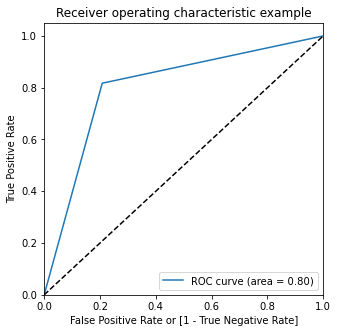

In [126]:
# Calling the ROC function

draw_roc(y_train_pred_df.actual_lead_converted, y_train_pred_df.predict_lead_converted)

#### We have got quite good curve of the ROC with 0.80 value and we have good values of sensitivity and specificity  So let's choose 0.45as our cutoff now

### Step 7: Prediction on Test data

In [142]:
X_test[numerical_col] = scaler.transform(X_test[numerical_col])

In [143]:
cols = X_train.columns
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [144]:
X_test = X_test[cols]

In [145]:
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_SMS Sent,What is your current occupation_Working Professional
8536,-1.099668,1,0,0,0,0,1,0
945,-1.098480,0,0,0,0,1,0,0
1550,-1.099771,0,1,0,0,0,0,0
8570,-1.099043,1,0,0,0,0,0,1
1410,-1.098857,1,0,0,0,0,0,0


In [146]:
X_test.shape

(1361, 8)

In [147]:
y_test_pred = lr_res.predict(sm.add_constant(X_test))
y_test_pred

8536    0.309599
945     0.176183
1550    0.722569
8570    0.477051
1410    0.156086
          ...   
2718    0.156142
8201    0.156662
7328    0.309686
283     0.156086
5379    0.156328
Length: 1361, dtype: float64

In [148]:
y_test_pred = y_test_pred.values.reshape(-1)

In [149]:
y_test_pred_df = pd.DataFrame({'Actual_lead_converted':y_test.values,'Probability_of_conversion':y_test_pred})
y_test_pred_df

,Actual_lead_converted,Probability_of_conversion
0,0,0.309599
1,0,0.176183
2,1,0.722569
3,1,0.477051
4,0,0.156086
...,...,...
1356,0,0.156142
1357,0,0.156662
1358,1,0.309686
1359,0,0.156086


In [150]:
#with 45 threshold
y_test_pred_df['Predicted_lead_conversion'] = y_test_pred_df.Probability_of_conversion.map(lambda x:1 if x>0.45 else 0)
y_test_pred_df.head()

,Actual_lead_converted,Probability_of_conversion,Predicted_lead_conversion
0,0,0.309599,0
1,0,0.176183,0
2,1,0.722569,1
3,1,0.477051,1
4,0,0.156086,0


In [151]:
#confusion Matrix
conf_matrix_test = metrics.confusion_matrix(y_test_pred_df['Actual_lead_converted'],y_test_pred_df['Predicted_lead_conversion'])
conf_matrix_test

array([[644,  22],
       [437, 258]], dtype=int64)

In [152]:
#checking the accuracy of test data
metrics.accuracy_score(y_test_pred_df['Actual_lead_converted'],y_test_pred_df['Predicted_lead_conversion'])

0.662747979426892

#### As we can see, we have obtained an accuracy score of 78% with current model

In [153]:
#calculating sensitivity and specificity
TP = conf_matrix_test[1,1]
TN = conf_matrix_test[0,0]
FP = conf_matrix_test[0,1]
FN = conf_matrix_test[1,0]

In [154]:
#sensitivity
sensitivity_test = TP/(TP+FN)
sensitivity_test

0.3712230215827338

In [155]:
#specificity
specificity_test = TN/(TN+FP)
specificity_test

0.9669669669669669

#### Hence, we obtained sensitivity of 80% and specificity of 75% with  current logistic regression model which is quite satisfactory

In [156]:
precision = TP/(TP+FP)
precision

0.9214285714285714

In [157]:
recall = TP/(TP+FN)
recall

0.3712230215827338

In [158]:
X_test

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_SMS Sent,What is your current occupation_Working Professional
8536,-1.099668,1,0,0,0,0,1,0
945,-1.098480,0,0,0,0,1,0,0
1550,-1.099771,0,1,0,0,0,0,0
8570,-1.099043,1,0,0,0,0,0,1
1410,-1.098857,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2718,-1.098561,1,0,0,0,0,0,0
8201,-1.095834,1,0,0,0,0,0,0
7328,-1.099208,1,0,0,0,0,1,0
283,-1.098857,1,0,0,0,0,0,0


In [159]:
y_test_pred_df

,Actual_lead_converted,Probability_of_conversion,Predicted_lead_conversion
0,0,0.309599,0
1,0,0.176183,0
2,1,0.722569,1
3,1,0.477051,1
4,0,0.156086,0
...,...,...,...
1356,0,0.156142,0
1357,0,0.156662,0
1358,1,0.309686,0
1359,0,0.156086,0


In [160]:
df = pd.merge(X_test,y_test_pred_df,how = 'left',left_index = True, right_index = True)

In [161]:
df[df["Predicted_lead_conversion"]==1.0]

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_SMS Sent,What is your current occupation_Working Professional,Actual_lead_converted,Probability_of_conversion,Predicted_lead_conversion
945,-1.098480,0,0,0,0,1,0,0,1.0,1.043569,1.0
210,-1.096332,1,0,0,0,1,0,0,1.0,0.723367,1.0
846,-1.099771,0,1,0,0,0,0,0,1.0,0.888969,1.0
385,-1.098919,1,0,0,0,0,0,0,1.0,0.630799,1.0
1329,-1.097321,1,0,0,0,0,1,0,0.0,0.527955,1.0
29,-1.099528,0,0,0,0,0,0,0,1.0,0.695864,1.0
810,-1.099771,0,1,0,0,0,0,0,1.0,0.477735,1.0
1055,-1.096245,1,0,0,0,0,1,0,1.0,0.529213,1.0
931,-1.099345,1,0,0,0,0,0,0,1.0,1.197237,1.0
973,-1.096245,0,0,0,0,0,1,0,0.0,0.527961,1.0


In [162]:
lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3165
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                         0.15701
Method:                          IRLS   Log-Likelihood:                -1561.0
Date:                Mon, 10 Jul 2023   Deviance:                       496.95
Time:                        21:51:20   Pearson chi2:                     497.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4481
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5836      0.021     28.398      0.000       0.543       0.624
Total Time Spent on Website                              0.1904      0.007     25.717      0.000       0.176       0.205
Lead Origin_Landing Page Submission                     -0.2183      0.021    -10.359      0.000      -0.260      -0.177
Lead Source_Reference                                    0.3483      0.034     10.203      0.000       0.281       0.415
Lead Source_Welingak Website                             0.5140      0.134      3.844      0.000       0.252       0.776
Do Not Email_Yes                                        -0.2320      0.027     -8.460      0.000      -0.286      -0.178
Last Activity_Converted to Lead                         -0.1983      0.035     -5.608      0.000      -0.268      -0.129
Last Activity_SMS Sent                                   0.1537      0.015     10.184      0.000       0.124       0.183
What is your current occupation_Working Professional     0.3210      0.021     15.350      0.000       0.280       0.362
========================================================================================================================
"""

X Education can make use of the following points in order to convert their leads into successful leads:
1. It is observed that those who working professionals are more prone to opt for the courses
2. Also, those Source Reference and Welingak Website can also be taken into consideration for the successful lead
3. Those who vists the website and spend considerable amount of time there, can be approached to convert them into successful leads
4. When the last activity is Converted to Lead and SMS Sent, then there are high chances of them getting converted into successful leads